In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import git
import os
from sklearn.cluster import KMeans
import scipy

git_repo = git.Repo('.', search_parent_directories=True) 
git_root = git_repo.git.rev_parse('--show-toplevel')

In [ ]:
df = pd.read_csv(os.path.join(git_root, "annotated/spidr_autoregulatory_binding_matrix.csv"))
df.set_index('Unnamed: 0', inplace=True)

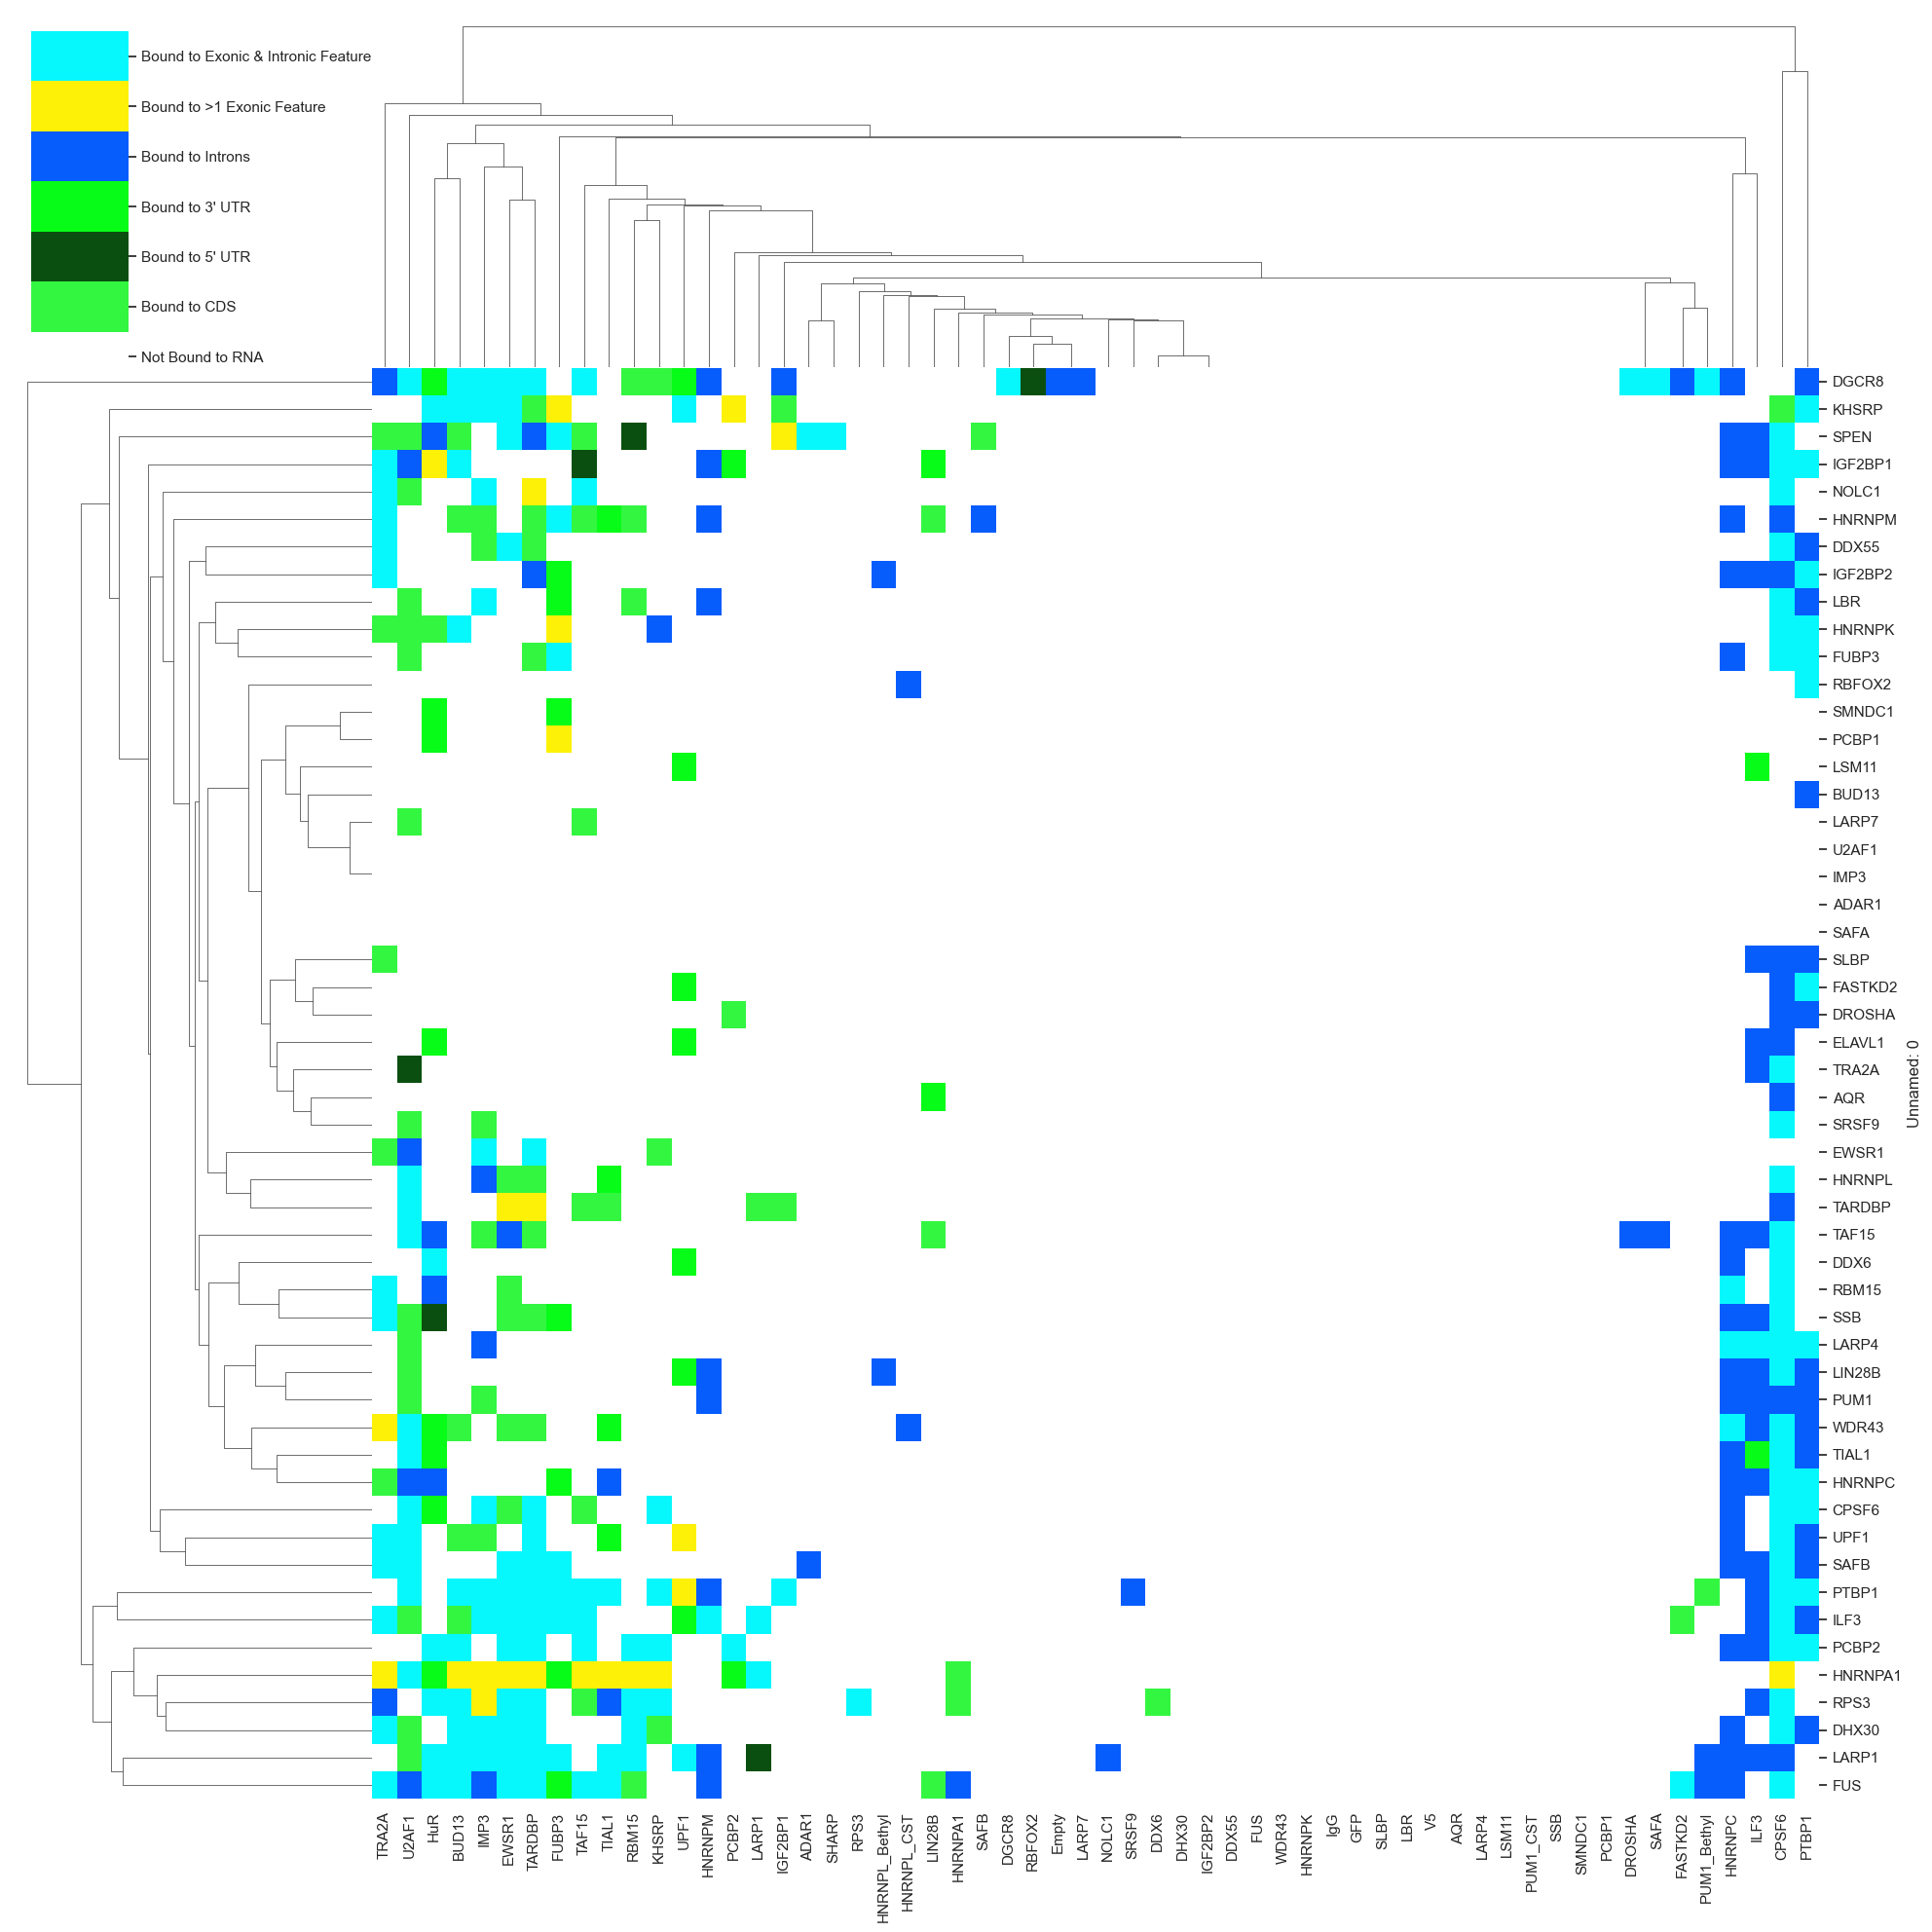

In [44]:
value_to_int = {
    'Not Bound to RNA': 0,
    'Bound to CDS': 1,
    "Bound to 5' UTR": 2,
    "Bound to 3' UTR": 3,
    'Bound to Introns': 4,
    'Bound to >1 Exonic Feature': 5,
    'Bound to Exonic & Intronic Feature': 6
}

# discrete colormap (n samples from a given cmap)
n = len(value_to_int)

# 0 = white, 1 = green, 2 = very dark green, 3 = light green, 4 = Blue, 5 = yellow, 6 = teal
palette = ["#FFFFFF", "#33F641", "#0A4F0F", "#07FC18", "#075CFC", "#FCF107", "#07F8FC"]
cmap = sns.color_palette(palette, n)

hm = sns.clustermap(df, cmap=cmap, figsize=(20,20))

# modify colorbar:
colorbar = hm.ax_heatmap.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))                                          
plt.savefig(os.path.join(git_root, "figures/categorical-heatmap.png"))